In [1]:
import os

# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

os.chdir("../")

print("Current working directory: {0}".format(os.getcwd()))

Current working directory: /Users/magdalenakortas/Desktop/magda-ds-onboarding/anomaly_detection/other_research
Current working directory: /Users/magdalenakortas/Desktop/magda-ds-onboarding/anomaly_detection


In [13]:
import numpy as np
import utils
from sklearn.ensemble import IsolationForest
from tensorflow import random

outliers_fraction = float(0.2)

The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

In [14]:
RANDOM_SEED = 42
PATH = "data/processed/processed_NE016_10_data.csv"

np.random.seed(RANDOM_SEED)
random.set_seed(RANDOM_SEED)

df_train, df_val, df_test = utils.read_split_data(PATH)

## Isolation forest

In [15]:
model = IsolationForest(contamination=outliers_fraction, random_state=RANDOM_SEED)
model.fit(df_train[utils.FEATURE_LIST])

/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


IsolationForest(contamination=0.2, random_state=42)

In [16]:
df_test["anomaly"] = model.predict(df_test[utils.FEATURE_LIST])

## Evaluate results

In [17]:
y_pred = np.array(df_test["anomaly"])
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
y_test = np.array(df_test[utils.TARGET_COL])

Prediction binary_accuracy (mapped) = 87.31037740801007%
Prediction F-score (mapped) = 0.3869658932420439


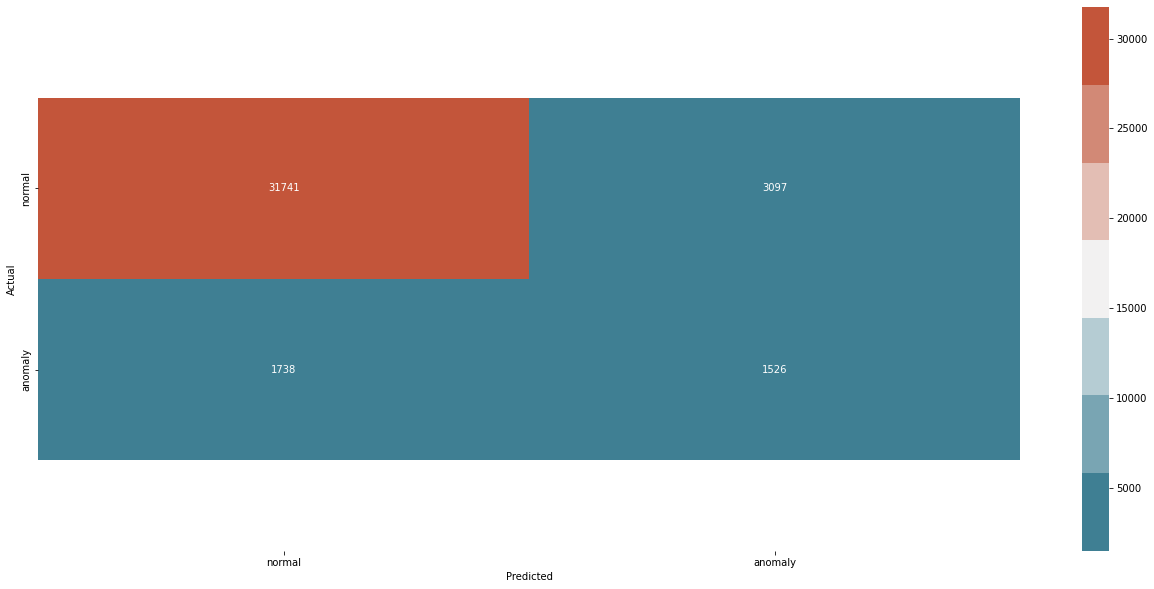


 Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93     34838
           1       0.33      0.47      0.39      3264

    accuracy                           0.87     38102
   macro avg       0.64      0.69      0.66     38102
weighted avg       0.90      0.87      0.88     38102



(0.8731037740801008, 0.3869658932420439)

In [18]:
utils.show_metrics(y_pred, y_test)